<a href="https://colab.research.google.com/github/Alexjmsherman/nlp_practicum_cohort3_student/blob/master/lessons/lesson_2_text_preprocessing/text_preprocessing_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Preprocessing Exercise
##### Author: Alex Sherman | alsherman@deloitte.com

#### Agenda

1. SpaCy
2. Text Tokenization, POS Tagging, Parsing, NER
3. Text Pipelines
4. Phrase Models
5. Python Fundamentals: Collections, Itertools, list comprehensions, sorted, apply
6. Text Rule-based matching
7. Advanced SpaCy Examples

In [0]:
# INSTALLATION
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 852.3MB 1.1MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-4gtkcozf/wheels/0d/bc/67/e6a9108ab86cd076703af19ad4e0f02f57381ac6583df16249
Successfully built en-core-web-lg

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
import os
import pandas as pd
from sqlalchemy import create_engine
from IPython.core.display import display, HTML
from IPython.display import Image
from configparser import ConfigParser, ExtendedInterpolation

In [0]:
f = r'https://raw.githubusercontent.com/Alexjmsherman/nlp_practicum_cohort3_student/master/raw_data/pubmed/pubmed_data.txt?token=ABXRUPUINCXWMBC62DHSAG25BRAJW'
df = pd.read_csv(f, sep='\t', header=None, names=['text'])

In [7]:
# increase the number of characters displayed in each column
pd.set_option('display.max_colwidth', 100)
df.head()

,text
0,acid base diagrams
1,immunising against receptors for antigen
2,immune complexes in rheumatic disease
3,loss of hla antigens associated with hormonal state
4,hypocalcaemia after thyroidectomy


In [0]:
# example text
text = df.text[27]
text

'to investigate the myelinotoxicity of cerebropsinal fluid in multiple sclerosis we used an in vivo model of the myelinated central nervous system tract of tadpoles for quantitative double blind tests of cerebrospinal fluid samples'

### SpaCy

"SpaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you're working with a lot of text, you'll eventually want to know more about it. For example, what's it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

SpaCy is designed specifically for production use and helps you build applications that process and "understand" large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

SpaCy is not research software. It's built on the latest research, but it's designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and research. The main difference is that SpaCy is integrated and opinionated. SpaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets SpaCy deliver generally better performance and developer experience."

### SpaCy Features 

NAME |	DESCRIPTION |
:----- |:------|
Tokenization|Segmenting text into words, punctuations marks etc.|
Part-of-speech (POS) Tagging|Assigning word types to tokens, like verb or noun.|
Dependency Parsing|	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.|
Lemmatization|	Assigning the base forms of words. For example, the lemma of "was" is "be", and the lemma of "rats" is "rat".|
Sentence Boundary Detection (SBD)|	Finding and segmenting individual sentences.|
Named Entity Recognition (NER)|	Labelling named "real-world" objects, like persons, companies or locations.|
Similarity|	Comparing words, text spans and documents and how similar they are to each other.|
Text Classification|	Assigning categories or labels to a whole document, or parts of a document.|
Rule-based Matching|	Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.|
Training|	Updating and improving a statistical model's predictions.|
Serialization|	Saving objects to files or byte strings.|

SOURCE: https://spacy.io/usage/spacy-101

## SpaCy Installation:
- Windows: Download Microsoft Visual C++: 
1.	Go to: https://www.visualstudio.com/downloads/#build-tools-for-visual-studio-2017
2.	Download the first link for Visual Studio Community 2017
3.	During the install select the option to install Desktop with Development C++ (see image below)

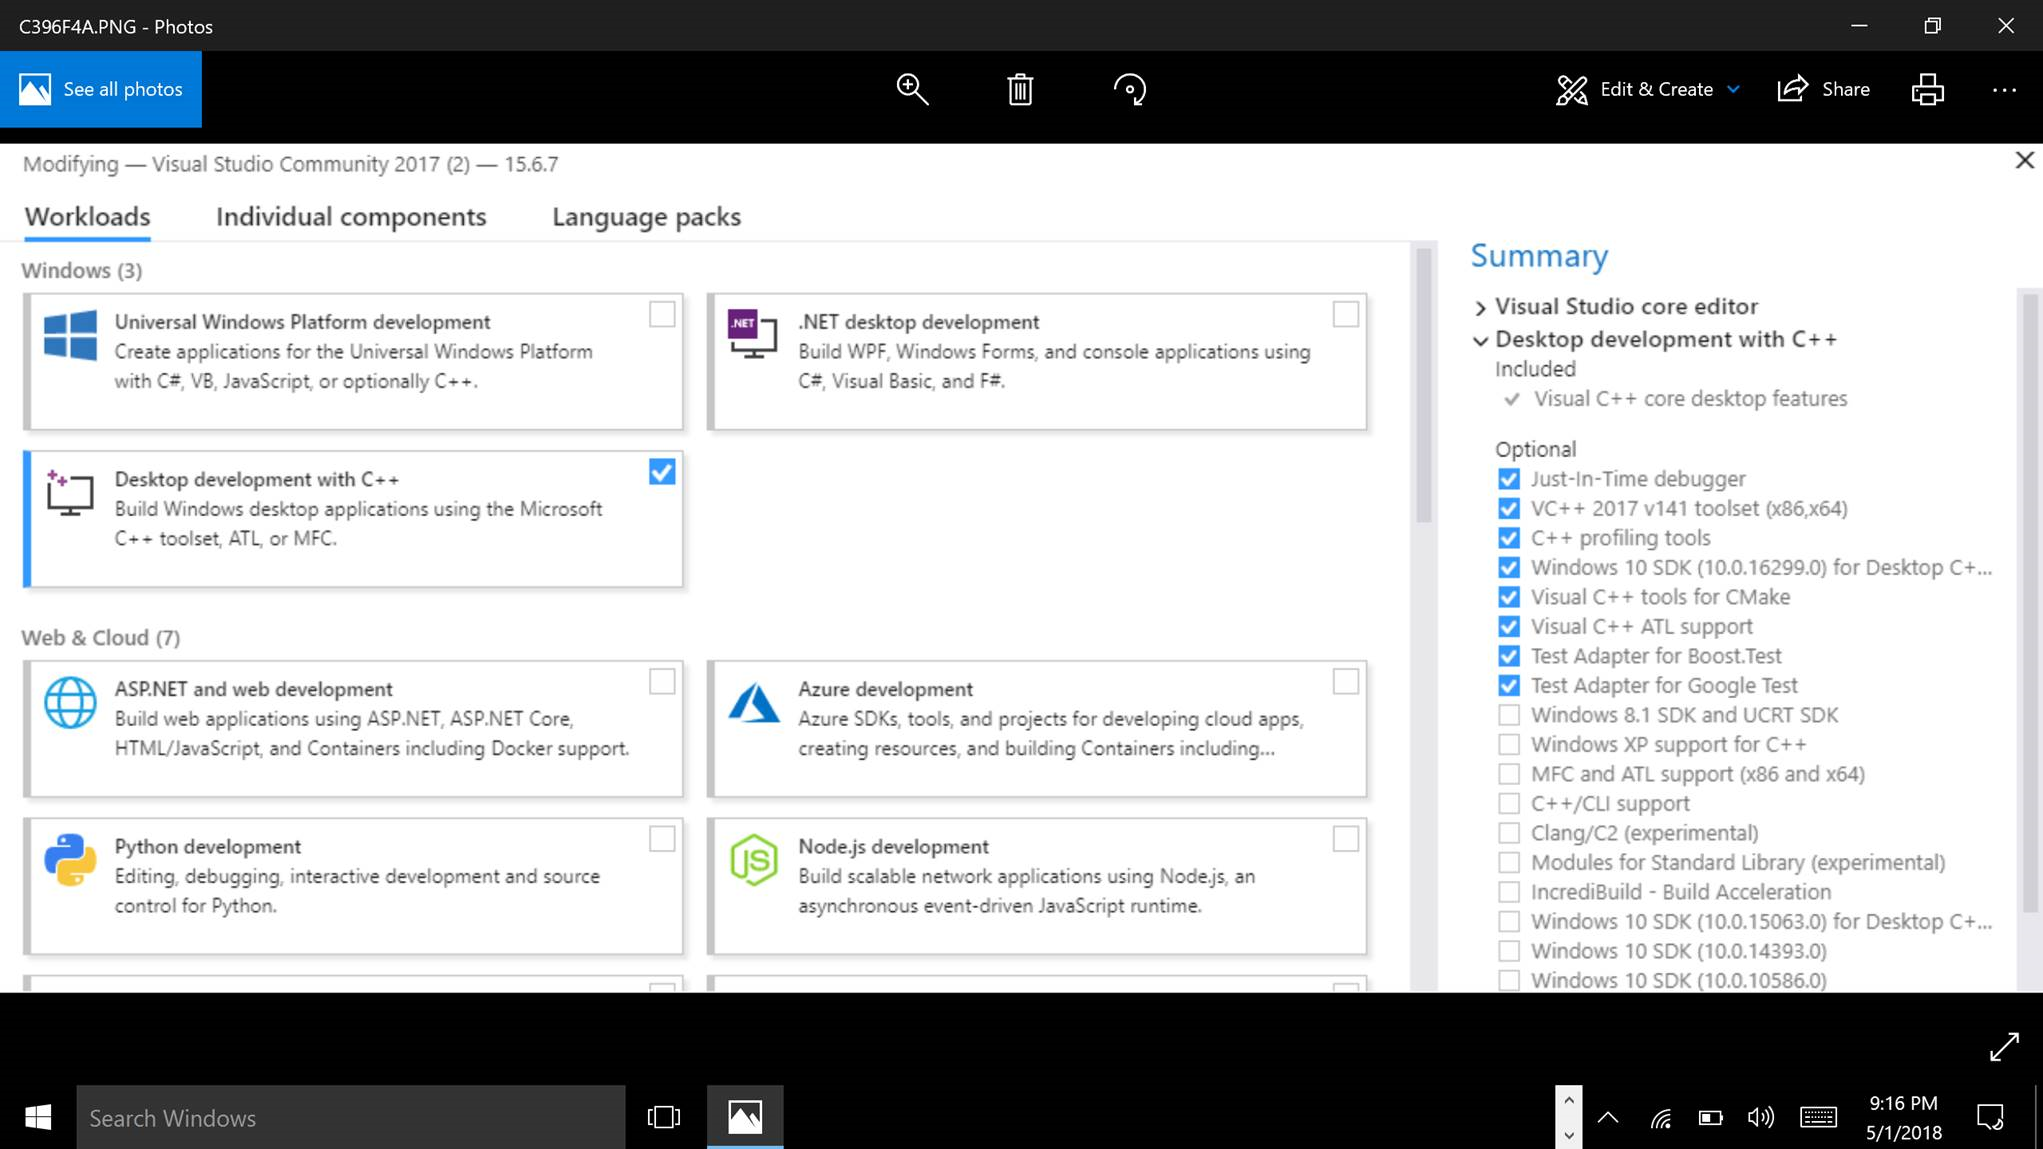

In [0]:
Image('https://s3.amazonaws.com/nlp.practicum/visual_studio_community.png', width=1000)

##### SpaCy Installation
Run the following using git bash as an administrator (i.e. right click on the git bash logo and select 'Run as Admin')
- conda install -c conda-forge spacy
- python -m spacy download en

##### if you run into an error try the following:
- python -m spacy link en_core_web_sm en
- SOURCE: https://github.com/explosion/spaCy/issues/950

##### Optional to install a convolutional neural network model  (~800MB). This is the model I will use in class:
- python -m spacy download en_core_web_lg

##### Test the following code from git bash (even if previous step failed):
start python
- python -i

test if SpaCy was downloaded
- import spacy

approach 1: test if model downloaded
- nlp = spacy.load('en') 

appraoch 2: test this if spacy.load('en') failed
- import en_core_web_sm
- nlp = en_core_web_sm.load()

exit Python
- exit()


##### Optional - install on an AWS EC2 instance
Instance: Amazon Linux 2 LTS Candidate 2 AMI (HVM), SSD Volume Type

- #!/bin/bash
- sudo yum update -y
- sudo yum groupinstall 'Development Tools' -y
- sudo easy_install pip
- sudo yum install python-devel -y
- sudo pip install spacy
- sudo python -m spacy download en_core_web_lg

In [0]:
# confirm which conda environment you are using - make sure it is one with SpaCy installed
import sys
sys.executable

# if you have difficulty importing spacy try the following in git bash
# conda install ipykernel --name Python3

'/usr/bin/python3'

In [0]:
import spacy
from spacy import displacy

In [0]:
%%time

# read in a simple (small) English language model
nlp = spacy.load('en')

# another approach:
# import en_core_web_sm
# nlp = en_core_web_sm.load()

CPU times: user 743 ms, sys: 87.1 ms, total: 830 ms
Wall time: 2.38 s


In [0]:
%%time 

# read in a (large) convolutional neural network model
# this will only work after the CNN model is downloaded (~800MB)
# e.g. python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg') 

CPU times: user 11.4 s, sys: 1.31 s, total: 12.7 s
Wall time: 12.7 s


In [0]:
# review text
text

'to investigate the myelinotoxicity of cerebropsinal fluid in multiple sclerosis we used an in vivo model of the myelinated central nervous system tract of tadpoles for quantitative double blind tests of cerebrospinal fluid samples'

In [0]:
# instantiate the document text
doc = nlp(text)

In [0]:
# view the text from the SpaCy object
doc

to investigate the myelinotoxicity of cerebropsinal fluid in multiple sclerosis we used an in vivo model of the myelinated central nervous system tract of tadpoles for quantitative double blind tests of cerebrospinal fluid samples

In [0]:
# which the SpaCy document methods and attributes
print(dir(doc))

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_bulk_merge', '_py_tokens', '_realloc', '_vector', '_vector_norm', 'cats', 'char_span', 'count_by', 'doc', 'ents', 'extend_tensor', 'from_array', 'from_bytes', 'from_disk', 'get_extension', 'get_lca_matrix', 'has_extension', 'has_vector', 'is_parsed', 'is_sentenced', 'is_tagged', 'mem', 'merge', 'noun_chunks', 'noun_chunks_iterator', 'print_tree', 'remove_extension', 'retokenize', 'sentiment', 'sents', 'set_extension', 'similarity', 'tensor', 'text', 'text_with_ws', 'to_array', 'to_bytes', 'to_disk', 'user_data', 'user_hooks', 'user_span_hooks', 'user_token_hooks', 'vector', 'vector_

### NLP Pipeline

When you read the text into spaCy, e.g. doc = nlp(text), you are applying a pipeline of nlp processes to the text.
by default spaCy applies a tagger, parser, and ner, but you can choose to add, replace, or remove these steps.
Note: Removing unnecessary steps for a given nlp can lead to substantial descreses in processing time.

In [0]:
# SpaCy pipeline
spacy_url = 'https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg'
iframe = '<iframe src={} width=1000 height=200></iframe>'.format(spacy_url)
HTML(iframe)

### Tokenization

SpaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off – whereas "U.K." should remain one token. 

In [0]:
tokenization_url = 'https://spacy.io/tokenization-57e618bd79d933c4ccd308b5739062d6.svg'
iframe = '<iframe src={} width=650 height=400></iframe>'.format(tokenization_url)
HTML(iframe)

##### Lexeme - entries in the vocabulary

In [0]:
# import a list of stop words from SpaCy
from spacy.lang.en.stop_words import STOP_WORDS

print('Example stop words: {}'.format(list(STOP_WORDS)[0:10]))

Example stop words: ['around', 'other', 'may', 'of', 'had', 'very', 'whatever', 'cannot', 'herein', 'still']


In [0]:
nlp.vocab['have']

In [0]:
print(dir(nlp.vocab['have']))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'check_flag', 'cluster', 'flags', 'from_bytes', 'has_vector', 'is_alpha', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'norm', 'norm_', 'orth', 'orth_', 'prefix', 'prefix_', 'prob', 'rank', 'sentiment', 'set_attrs', 'set_flag', 'shape', 'shape_', 'similarity', 'suffix', 'suffix_', 'text', 'to_bytes', 'vector', 'vector_norm', 'vocab']


In [0]:
nlp.vocab['have'].is_stop

True

In [0]:
# search for word in the SpaCy vocabulary and
# change the is_stop attribute to True

for word in STOP_WORDS:
    nlp.vocab[word].is_stop = True

### Part-of-speech (POS) Tagging

After tokenization, spaCy can parse and tag a given Doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following "the" in English is most likely a noun.

Annotation | Description
:----- |:------|
Text |The original word text|
Lemma |The base form of the word.|
POS |The simple part-of-speech tag.|
Tag |The detailed part-of-speech tag.|
Dep |Syntactic dependency, i.e. the relation between tokens.|
Shape |The word shape – capitalisation, punctuation, digits.|
Is Alpha |Is the token an alpha character?|
Is Stop |Is the token part of a stop list, i.e. the most common words of the language?|

In [0]:
# review document
doc

to investigate the myelinotoxicity of cerebropsinal fluid in multiple sclerosis we used an in vivo model of the myelinated central nervous system tract of tadpoles for quantitative double blind tests of cerebrospinal fluid samples

In [0]:
# check if POS tags were added to the doc in the NLP pipeline
doc.is_tagged

True

In [0]:
# print column headers
print('{:15} | {:15} | {:8} | {:8} | {:11} | {:8} | {:8} | {:8} | '.format(
    'TEXT','LEMMA_','POS_','TAG_','DEP_','SHAPE_','IS_ALPHA','IS_STOP'))

# print various SpaCy POS attributes
for token in doc:
    print('{:15} | {:15} | {:8} | {:8} | {:11} | {:8} | {:8} | {:8} |'.format(
          token.text, token.lemma_, token.pos_, token.tag_, token.dep_
        , token.shape_, token.is_alpha, token.is_stop))

TEXT            | LEMMA_          | POS_     | TAG_     | DEP_        | SHAPE_   | IS_ALPHA | IS_STOP  | 
to              | to              | PART     | TO       | aux         | xx       |        1 |        1 |
investigate     | investigate     | VERB     | VB       | ROOT        | xxxx     |        1 |        0 |
the             | the             | DET      | DT       | det         | xxx      |        1 |        1 |
myelinotoxicity | myelinotoxicity | NOUN     | NN       | dobj        | xxxx     |        1 |        0 |
of              | of              | ADP      | IN       | prep        | xx       |        1 |        1 |
cerebropsinal   | cerebropsinal   | ADJ      | JJ       | amod        | xxxx     |        1 |        0 |
fluid           | fluid           | NOUN     | NN       | pobj        | xxxx     |        1 |        0 |
in              | in              | ADP      | IN       | prep        | xx       |        1 |        1 |
multiple        | multiple        | ADJ      | JJ     

##### create (adjective --> noun) phrases from parts of speech

In [0]:
previous_token = doc[0]  # set first token

for token in doc[1:]:    
    # identify adjective noun pairs
    if previous_token.pos_ == 'ADJ' and token.pos_ == 'NOUN':
        print(f'{previous_token.text}_{token.text}')
    
    previous_token = token

cerebropsinal_fluid
multiple_sclerosis
vivo_model
nervous_system
blind_tests
fluid_samples


##### word sense disambiguation via part of speech tags

In [0]:
for token in doc[0:20]:
    print(f'{token.text}_{token.pos_}')

to_PART
investigate_VERB
the_DET
myelinotoxicity_NOUN
of_ADP
cerebropsinal_ADJ
fluid_NOUN
in_ADP
multiple_ADJ
sclerosis_NOUN
we_PRON
used_VERB
an_DET
in_ADP
vivo_ADJ
model_NOUN
of_ADP
the_DET
myelinated_VERB
central_ADJ


### Text Dependency Parsing

spaCy features a fast and accurate syntactic dependency parser, and has a rich API for navigating the tree. The parser also powers the sentence boundary detection, and lets you iterate over base noun phrases, or "chunks". You can check whether a Doc  object has been parsed with the doc.is_parsed attribute, which returns a boolean value. If this attribute is False, the default sentence iterator will raise an exception.

In [0]:
# check is document has been parsed (dependency parsing)
doc.is_parsed

True

In [0]:
print('{:15} | {:10} | {:15} | {:10} | {:25} | {:25}'.format(
    'TEXT','DEP','HEAD TEXT','HEAD POS','CHILDREN','LEFTS'))

for token in doc:
    print('{:15} | {:10} | {:15} | {:10} | {:25} | {:25}'.format(
        token.text, token.dep_, token.head.text, token.head.pos_,
        str([child for child in token.children]), str([t.text for t in token.lefts])))

TEXT            | DEP        | HEAD TEXT       | HEAD POS   | CHILDREN                  | LEFTS                    
to              | aux        | investigate     | VERB       | []                        | []                       
investigate     | ROOT       | investigate     | VERB       | [to, myelinotoxicity]     | ['to']                   
the             | det        | myelinotoxicity | NOUN       | []                        | []                       
myelinotoxicity | dobj       | investigate     | VERB       | [the, of, in, used]       | ['the']                  
of              | prep       | myelinotoxicity | NOUN       | [fluid]                   | []                       
cerebropsinal   | amod       | fluid           | NOUN       | []                        | []                       
fluid           | pobj       | of              | ADP        | [cerebropsinal]           | ['cerebropsinal']        
in              | prep       | myelinotoxicity | NOUN       | [sclerosis

#### NOUN CHUNCKS:

| **TERM** | Definition |
|:---|:---:|
| **Text** | The original noun chunk text |
| **Root text** | The original text of the word connecting the noun chunk to the rest of the parse |
| **Root dependency** | Dependency relation connecting the root to its head |
| **Root head text** | The text of the root token's head |

In [0]:
print('{:15} | {:10} | {:15} | {:40}'.format('ROOT_TEXT','ROOT','DEPENDENCY','TEXT'))

for chunk in list(doc.noun_chunks):
    print('{:15} | {:10} | {:15} | {:40}'.format(
        chunk.root.text, chunk.root.dep_, chunk.root.head.text, chunk.text))

ROOT_TEXT       | ROOT       | DEPENDENCY      | TEXT                                    
myelinotoxicity | dobj       | investigate     | the myelinotoxicity                     
fluid           | pobj       | of              | cerebropsinal fluid                     
sclerosis       | pobj       | in              | multiple sclerosis                      
we              | nsubj      | used            | we                                      
model           | pobj       | in              | vivo model                              
tract           | pobj       | of              | the myelinated central nervous system tract
tadpoles        | pobj       | of              | tadpoles                                
tests           | pobj       | for             | quantitative double blind tests         
samples         | pobj       | of              | cerebrospinal fluid samples             


In [0]:
# dependency visualization

# show visualization in Jupyter Notebook
displacy.render(docs=doc, style='dep', jupyter=True)

# Another Option
# uncomment and run the below code, then open another browser tab and go to http://localhost:5000
# when you are done (before you run the next cell in the notebook) stop this cell
# displacy.serve(docs=doc, style='dep')

### Named Entity Recognition (NER)

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product, or a book title. spaCy can recognise various types of named entities in a document, by asking the model for a prediction. 

In [0]:
ner_text = "When I told John that I wanted to move to Alaska, he warned me that I'd have trouble finding a Starbucks there."
ner_doc = nlp(ner_text)

In [0]:
print('{:10} | {:15}'.format('LABEL','ENTITY'))

for ent in ner_doc.ents[0:20]:
    print('{:10} | {:50}'.format(ent.label_, ent.text))

LABEL      | ENTITY         
PERSON     | John                                              
GPE        | Alaska                                            
ORG        | Starbucks                                         


In [0]:
# ent methods and attributes
print(dir(ent))

['_', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_recalculate_indices', '_vector', '_vector_norm', 'as_doc', 'doc', 'end', 'end_char', 'ent_id', 'ent_id_', 'ents', 'get_extension', 'get_lca_matrix', 'has_extension', 'has_vector', 'label', 'label_', 'lefts', 'lemma_', 'lower_', 'merge', 'n_lefts', 'n_rights', 'noun_chunks', 'orth_', 'remove_extension', 'rights', 'root', 'sent', 'sentiment', 'set_extension', 'similarity', 'start', 'start_char', 'string', 'subtree', 'text', 'text_with_ws', 'to_array', 'upper_', 'vector', 'vector_norm', 'vocab']


In [0]:
# entity visualization
# after you run this code, open another browser and go to http://localhost:5000
# when you are done (before you run the next cell in the notebook) stop this cell 

displacy.render(docs=ner_doc, style='ent', jupyter=True)

# Pipeline

If you have a sequence of documents to process, you should use the Language.pipe()  method. The method takes an iterator of texts, and accumulates an internal buffer, which it works on in parallel. It then yields the documents in order, one-by-one.

- batch_size: number of docs to process per thread
- disable: Names of pipeline components to disable to speed up text processing.
                                    

In [0]:
from spacy.pipeline import Pipe

In [0]:
# create a dataframe with a subset of the data, mentioning the word immune
immune_df = df[df.text.str.contains('immune')].text

# print the count of matches
print('Lines with the term immune: {}\n'.format(len(immune_df)))

# view the first five section names
for line in immune_df.head(2):
    print(line, '\n')

Lines with the term immune: 3531

immune complexes in rheumatic disease 

the human reovirus like hrvl agent nebraska calf diarrhea virus ncdv epizootic diarrhea of infant mice edim virus simian agent sa and the offal agent were found to be similar if not identical in reciprocal complement fixation cf tests employing hyperimmune animal sera 



In [0]:
%%time

for doc in nlp.pipe(immune_df.head(10)):  # includes ['parser','tagger','ner']
    if 'immune' in doc.text:
        print(doc, '\n')

immune complexes in rheumatic disease 

the human reovirus like hrvl agent nebraska calf diarrhea virus ncdv epizootic diarrhea of infant mice edim virus simian agent sa and the offal agent were found to be similar if not identical in reciprocal complement fixation cf tests employing hyperimmune animal sera 

the immunoglobulin ig of rabbit anti vaccinia serum and the ig of the pre immune serum conjugated with fluorescein isothiocyanate fitc was employed 

evidence of an underlying immune mechanism was sought 

cultured allografts can be rejected if the host immune system is stimulated with viable leukocytes of donor origin 

we used the loose body test after van soeren as screening test controlled positive test results for several times under the same experimental conditions and supplemented it by the le cell test after zinkham and conley or later on by the immune fluorescence test 

membrane antigens of cultured human melanoma line uclaso were studied using immune adherence technique

### SpaCy - Tips for faster processing

You can substantially speed up the time it takes SpaCy to read a document by disabling components of the NLP that are not necessary for a given task.

- Disable options: **parser, tagger, ner**

In [0]:
%%time

# processing occurs ~75x faster by disabling pipeline components
for doc in nlp.pipe(immune_df.head(10), disable=['parser','tagger','ner']):
    if 'immune' in doc.text:
        print(doc, '\n')

immune complexes in rheumatic disease 

the human reovirus like hrvl agent nebraska calf diarrhea virus ncdv epizootic diarrhea of infant mice edim virus simian agent sa and the offal agent were found to be similar if not identical in reciprocal complement fixation cf tests employing hyperimmune animal sera 

the immunoglobulin ig of rabbit anti vaccinia serum and the ig of the pre immune serum conjugated with fluorescein isothiocyanate fitc was employed 

evidence of an underlying immune mechanism was sought 

cultured allografts can be rejected if the host immune system is stimulated with viable leukocytes of donor origin 

we used the loose body test after van soeren as screening test controlled positive test results for several times under the same experimental conditions and supplemented it by the le cell test after zinkham and conley or later on by the immune fluorescence test 

membrane antigens of cultured human melanoma line uclaso were studied using immune adherence technique

##### Determine which NLP components can be disabled

In [0]:
def view_pos(doc, n_tokens=5):
    """ print SpaCy POS information about each token in a provided document """

    print('{:15} | {:10} | {:10} | {:30}'.format('TOKEN','POS','DEP_','LEFTS'))
    
    for token in doc[0:n_tokens]:
        print('{:15} | {:10} | {:10} | {:30}'.format(
            token.text, token.head.pos_,token.dep_, str([t.text for t in token.lefts])))

In [0]:
# observe results from the default pipeline
pos_doc = nlp(text)
view_pos(pos_doc)

TOKEN           | POS        | DEP_       | LEFTS                         
to              | VERB       | aux        | []                            
investigate     | VERB       | ROOT       | ['to']                        
the             | NOUN       | det        | []                            
myelinotoxicity | VERB       | dobj       | ['the']                       
of              | NOUN       | prep       | []                            


In [0]:
# observe which part of speech (pos) attributes are disabled by parser
pos_doc = nlp(text, disable=['ner','parser'])
view_pos(pos_doc)

TOKEN           | POS        | DEP_       | LEFTS                         
to              | PART       |            | []                            
investigate     | VERB       |            | []                            
the             | DET        |            | []                            
myelinotoxicity | NOUN       |            | []                            
of              | ADP        |            | []                            


In [0]:
# observe which part of speech (pos) attributes are disabled by tagger
pos_doc = nlp(text, disable=['ner','tagger'])
view_pos(pos_doc, n_tokens=5)

TOKEN           | POS        | DEP_       | LEFTS                         
to              |            | aux        | []                            
investigate     |            | ROOT       | ['to']                        
the             |            | det        | []                            
myelinotoxicity |            | dobj       | ['the']                       
of              |            | prep       | []                            


### Fast Sentence Boundary Detection (SBD)

In [0]:
from spacy.lang.en import English

nlp_sbd = English()  # just the language with no model

sentencizer = nlp.create_pipe("sentencizer")
nlp_sbd.add_pipe(sentencizer)

doc = nlp_sbd("This is a sentence. This is another sentence.")

for sent in doc.sents:
    print(sent.text)

This is a sentence.
This is another sentence.


### Exercise
1. print all the distinct entities tagged with 'CARDINAL'
2. print all the distinct entities tagged with 'PERSON'
3. print all the distinct entities tagged with 'GPE'

For all exercises:
- use a batch size of 100
- disable the parser and tagger (ner is needed to add the tags)

In [0]:
%%time

# print all the distinct entities tagged as a CARDINAL
# search in immune_df.head(200)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [0]:
%%time

# print all the distinct entities tagged as an organization (ORG)
# search in immune_df.head(500)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [0]:
%%time

# print all the distinct entities tagged as a geopolitical entity (GPE)
# search in immune_df.head(1000)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


### Collocations

"A collocation is an expression consisting of two or more words that
correspond to some conventional way of saying things. Or in the words
of Firth (1957: 181): “Collocations of a given word are statements of the
habitual or customary places of that word.” Collocations include noun
phrases like strong tea and weapons of mass destruction, phrasal verbs like
to make up, and other stock phrases like the rich and powerful. Particularly
interesting are the subtle and not-easily-explainable patterns of word usage
that native speakers all know: why we say a stiff breeze but not a stiff wind
(while either a strong breeze or a strong wind is okay), or why we speak of
broad daylight (but not bright daylight or narrow darkness)



There are actually different definitions of the notion of collocation. Some
authors in the computational and statistical literature define a collocation
as two or more consecutive words with a special behavior, for example
Choueka (1988):
[A collocation is defined as] a sequence of two or more consecutive
words, that has characteristics of a syntactic and semantic
unit, and whose exact and unambiguous meaning or connotation
cannot be derived directly from the meaning or connotation of its
components. In most linguistically oriented research, a phrase
can be a collocation even if it is not consecutive (as in the example knock
. . . door). The following criteria are typical of linguistic treatments of collocations:

**Non-compositionality**: The meaning of a collocation is not a straightforward
composition of the meanings of its parts. Either the meaning
is completely different from the free combination (as in the case of idioms
like kick the bucket) or there is a connotation or added element of
meaning that cannot be predicted from the parts. For example, white
wine, white hair and white woman all refer to slightly different colors, so
we can regard them as collocations. 

**Non-substitutability**: We cannot substitute near-synonyms for the
components of a colloction. For example, we can’t say yellow wine
instead of white wine even though yellow is as good a description of the
color of white wine as white is (it is kind of a yellowish white).

**Non-modifiability**: Many collocations cannot be freely modified with
additional lexical material or through grammatical transformations.
This is especially true for frozen expressions like idioms. For example,
we can’t modify frog in to get a frog in one’s throat into to get an ugly
frog in one’s throat although usually nouns like frog can be modified by
adjectives like ugly. Similarly, going from singular to plural can make
an idiom ill-formed, for example in people as poor as church mice."

SOURCE: https://nlp.stanford.edu/fsnlp/promo/colloc.pdf

### Phrase (collocation) Detection

Phrase modeling is another approach to learning combinations of tokens that together represent meaningful multi-word concepts. We can develop phrase models by looping over the the words in our reviews and looking for words that co-occur (i.e., appear one after another) together much more frequently than you would expect them to by random chance. The formula our phrase models will use to determine whether two tokens $A$ and $B$ constitute a phrase is:

$$\frac{count(A\ B) - count_{min}}{count(A) * count(B)} > threshold$$

- $count(A\ B)$ is the number of times the tokens $A\ B$ appear in the corpus in order
- $count_{min}$ is a user-defined parameter to ensure that accepted phrases occur a minimum number of times
- $count(A)$ is the number of times token $A$ appears in the corpus
- $count(B)$ is the number of times token $B$ appears in the corpus
- $threshold$ is a user-defined parameter to control how strong of a relationship between two tokens the model requires before accepting them as a phrase

Once our phrase model has been trained on our corpus, we can apply it to new text. When our model encounters two tokens in new text that identifies as a phrase, it will merge the two into a single new token.

Phrase modeling is superficially similar to named entity detection in that you would expect named entities to become phrases in the model (so new york would become new_york). But you would also expect multi-word expressions that represent common concepts, but aren't specifically named entities (such as happy hour) to also become phrases in the model.

We turn to the indispensible gensim library to help us with phrase modeling — the Phrases class in particular.

SOURCE: 
- https://github.com/skipgram/modern-nlp-in-python/blob/master/executable/Modern_NLP_in_Python.ipynb
- https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf

# Gensim

In [0]:
from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess

In [0]:
# use gensim simple_preprocess to preprocess text
for text in immune_df:
    print(text, '\n')
    print(simple_preprocess(text))
    break

immune complexes in rheumatic disease 

['immune', 'complexes', 'in', 'rheumatic', 'disease']


In [0]:
gensim_text = [simple_preprocess(text) for text in immune_df]

print(gensim_text[0:5])

[['immune', 'complexes', 'in', 'rheumatic', 'disease'], ['the', 'human', 'reovirus', 'like', 'hrvl', 'agent', 'nebraska', 'calf', 'diarrhea', 'virus', 'ncdv', 'epizootic', 'diarrhea', 'of', 'infant', 'mice', 'edim', 'virus', 'simian', 'agent', 'sa', 'and', 'the', 'offal', 'agent', 'were', 'found', 'to', 'be', 'similar', 'if', 'not', 'identical', 'in', 'reciprocal', 'complement', 'fixation', 'cf', 'tests', 'employing', 'hyperimmune', 'animal', 'sera'], ['the', 'immunoglobulin', 'ig', 'of', 'rabbit', 'anti', 'vaccinia', 'serum', 'and', 'the', 'ig', 'of', 'the', 'pre', 'immune', 'serum', 'conjugated', 'with', 'fluorescein', 'isothiocyanate', 'fitc', 'was', 'employed'], ['evidence', 'of', 'an', 'underlying', 'immune', 'mechanism', 'was', 'sought'], ['cultured', 'allografts', 'can', 'be', 'rejected', 'if', 'the', 'host', 'immune', 'system', 'is', 'stimulated', 'with', 'viable', 'leukocytes', 'of', 'donor', 'origin']]


In [0]:
# create a list of stop words
from spacy.lang.en.stop_words import STOP_WORDS
common_terms = list(STOP_WORDS)

**common_terms:** optional list of “stop words” that won’t affect frequency count of expressions containing them.
- The common_terms parameter add a way to give special treatment to common terms (aka stop words) such that their presence between two words won’t prevent bigram detection. It allows to detect expressions like “bank of america” or “eye of the beholder”.

In [0]:
phrases = Phrases(
      gensim_text
    , common_terms=common_terms
    , min_count=5
    , threshold=5
    , scoring='default'
)

phrases

### Phrases Params

- **scoring:** specifies how potential phrases are scored for comparison to the threshold setting. scoring can be set with either a string that refers to a built-in scoring function, or with a function with the expected parameter names. Two built-in scoring functions are available by setting scoring to a string:

    - ‘default’: from “Efficient Estimaton of Word Representations in Vector Space” by Mikolov, et. al.: 
    
$$\frac{count(AB) - count_{min}}{count(A) * count(B)} * N > threshold$$
    


    - where N is the total vocabulary size.
    - Thus, it is easier to exceed the threshold when the two words occur together often or when the two words are rare (i.e. small product)

In [0]:
bigram = Phraser(phrases)

bigram

The phrases object still contains all the source text in memory. A gensim Phraser will remove this extra data to become smaller and somewhat faster than using the full Phrases model. To determine what data to remove, the Phraser ues the  results of the source model’s min_count, threshold, and scoring settings. (You can tamper with those & create a new Phraser to try other values.)

SOURCE: https://radimrehurek.com/gensim/models/phrases.html

In [0]:
def print_phrases(phraser, text_stream, num_underscores=2):
    """ identify phrases from a text stream by searching for terms that
        are separated by underscores and include at least num_underscores
    """
    
    phrases = []
    for terms in phraser[text_stream]:
        for term in terms:
            if term.count('_') >= num_underscores:
                phrases.append(term)
    print(set(phrases))

In [0]:
print_phrases(bigram, gensim_text)

{'humoral_and_cellular', 'role_in_the_pathogenesis', 'effective_in_preventing', 'patients_with_rheumatoid', 'patients_with_malignant', 'igg_and_igm', 'play_an_important', 'foot_and_mouth', 'consistent_with_the_hypothesis', 'primary_and_secondary', 'presence_of_circulating', 'vitro_and_in_vivo', 'cellular_and_humoral'}


### Tri-gram phrase model

We can place the text from the first phrase model into another Phrases object to create n-term phrase models. We can repear this process multiple times.

In [0]:
phrases = Phrases(
      bigram[gensim_text]
    , common_terms=common_terms
    , min_count=1
    , threshold=1
)

trigram = Phraser(phrases)

print_phrases(trigram, bigram[gensim_text], num_underscores=3)

{'immune_complexes_in_diabetic', 'determine_the_immune_status', 'patients_with_cytomegalovirus_infection', 'considered_to_be_of_practical', 'humoral_and_cell_mediated', 'sensitive_than_the_complement_fixation', 'consistent_with_the_hypothesis', 'igg_antibodies_from_erythrocytes', 'sheep_red_blood_cells', 'immune_responses_in_swine', 'pretreatment_of_the_animals', 'immune_responses_in_vitro', 'necessary_for_the_development', 'role_of_the_immune_response', 'modulation_of_immune_responses', 'patients_with_recurrent_herpes', 'anti_foot_and_mouth', 'immune_complexes_in_pregnancy', 'prove_to_be_useful', 'level_of_immune_complexes', 'depression_of_cell_mediated', 'specificity_of_cellular_immune', 'guinea_pig_and_bovine', 'immune_response_was_obtained', 'immune_status_of_the_study', 'immune_complexes_were_found', 'specificity_of_the_in_vitro', 'systemic_humoral_and_cellular', 'immune_reactivity_of_syngeneic', 'appeared_to_be_associated', 'humoral_and_cellular_immune_responses', 'measured_by_ra

In [0]:
for doc_num in [4]:
    print('DOC NUMBER: {}\n'.format(doc_num))
    print('ORIGINAL SENTENT: {}\n'.format(' '.join(gensim_text[doc_num])))
    print('BIGRAM: {}\n'.format(' '.join(bigram[gensim_text[doc_num]])))
    print('TRIGRAM: {}'.format(' '.join(trigram[bigram[gensim_text[doc_num]]])))
    print()

DOC NUMBER: 4

ORIGINAL SENTENT: cultured allografts can be rejected if the host immune system is stimulated with viable leukocytes of donor origin

BIGRAM: cultured allografts can be rejected if the host immune_system is stimulated with viable leukocytes of donor origin

TRIGRAM: cultured allografts can be rejected if the host_immune_system is stimulated with viable leukocytes of donor origin



#### Export Cleaned Text

In [0]:
# write the cleaned text to a new file for later use

#with open(CLEANED_TEXT_PATH, 'w') as f:
#    for line in bigram[gensim_text]:
#        line = ' '.join(line) + '\n'
#        line = line.encode('ascii', errors='ignore').decode('ascii')
#        f.write(line)

# Advanced Python

A brief overview of some advanced Python which will be used in future lessons

##### Collections - DefaultDict

Usually, a Python dictionary throws a KeyError if you try to get an item with a key that is not currently in the dictionary. The defaultdict in contrast will simply create any items that you try to access (provided of course they do not exist yet). To create such a "default" item, it calls the function object that you pass in the constructor (more precisely, it's an arbitrary "callable" object, which includes function and type objects). For the first example, default items are created using int(), which will return the integer object 0. For the second example, default items are created using list(), which returns a new empty list object.

In [0]:
from collections import defaultdict

In [0]:
pubmed_sentence = """PubMed Description: 
PubMed comprises more than 28 million citations for biomedical literature from MEDLINE, life science journals, and online books.
Citations may include links to full-text content from PubMed Central and publisher web sites.""".strip()

example_doc = nlp(pubmed_sentence)

In [0]:
# WRONG APPROACH - KeyError!

# try to create a word count dict with new keys
d = {}
for word in example_doc:
    d[word] += 1  # cannot add if the key does not exist

print(d)

KeyError: ignored

In [0]:
d = defaultdict(int)  # define the type of data the dict stores

for word in example_doc:
    d[word.text] += 1  # can add to unassigned keys

print(d)

defaultdict(<class 'int'>, {'PubMed': 3, 'Description': 1, ':': 1, '\n': 2, 'comprises': 1, 'more': 1, 'than': 1, '28': 1, 'million': 1, 'citations': 1, 'for': 1, 'biomedical': 1, 'literature': 1, 'from': 2, 'MEDLINE': 1, ',': 2, 'life': 1, 'science': 1, 'journals': 1, 'and': 2, 'online': 1, 'books': 1, '.': 2, 'Citations': 1, 'may': 1, 'include': 1, 'links': 1, 'to': 1, 'full': 1, '-': 1, 'text': 1, 'content': 1, 'Central': 1, 'publisher': 1, 'web': 1, 'sites': 1})


##### Collections - Counter

A Counter is a dict subclass for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.

SOURCE: https://docs.python.org/2/library/collections.html#collections.Counter

In [0]:
from collections import Counter

In [0]:
# count the number of times each CARDINAL appears
print(Counter(d))

Counter({'PubMed': 3, '\n': 2, 'from': 2, ',': 2, 'and': 2, '.': 2, 'Description': 1, ':': 1, 'comprises': 1, 'more': 1, 'than': 1, '28': 1, 'million': 1, 'citations': 1, 'for': 1, 'biomedical': 1, 'literature': 1, 'MEDLINE': 1, 'life': 1, 'science': 1, 'journals': 1, 'online': 1, 'books': 1, 'Citations': 1, 'may': 1, 'include': 1, 'links': 1, 'to': 1, 'full': 1, '-': 1, 'text': 1, 'content': 1, 'Central': 1, 'publisher': 1, 'web': 1, 'sites': 1})


##### Iterrtools - combinations

"The itertools module standardizes a core set of fast, memory efficient tools that are useful by themselves or in combination. Together, they form an “iterator algebra” making it possible to construct specialized tools succinctly and efficiently in pure Python.

**Combinations**
- Return r length subsequences of elements from the input iterable.
- Combinations are emitted in lexicographic sort order. So, if the input iterable is sorted, the combination tuples will be produced in sorted order.
- Elements are treated as unique based on their position, not on their value. So if the input elements are unique, there will be no repeat values in each combination.

SOURCE: https://docs.python.org/3.4/library/itertools.html

In [0]:
from itertools import combinations

In [0]:
terms = ['PubMed','Medline','Citation','Biomedical']
for combo in combinations(terms, 2):
    print(combo)

('PubMed', 'Medline')
('PubMed', 'Citation')
('PubMed', 'Biomedical')
('Medline', 'Citation')
('Medline', 'Biomedical')
('Citation', 'Biomedical')


##### List Comprehensions

In [0]:
# traditional iteration

terms_subset = []
for term in terms:
    if 'med' in term.lower():
        terms_subset.append(term)

terms_subset

['PubMed', 'Medline', 'Biomedical']

In [0]:
# list comprehension

#   return value   iteration           conditional
#[  term           for term in terms   if 'med' in term.lower()]

[term for term in terms if 'med' in term.lower()]

['PubMed', 'Medline', 'Biomedical']

##### Sorted

sorted(iterable, key=None, reverse=False)

- Return a new sorted list from the items in iterable.
- Has two optional arguments which must be specified as keyword arguments.
- key specifies a function of one argument that is used to extract a comparison key from each list element: key=str.lower. The default value is None (compare the elements directly).
- reverse is a boolean value. If set to True, then the list elements are sorted as if each comparison were reversed.

SOURCE: https://docs.python.org/3/library/functions.html#sorted

In [0]:
articles =[('article2', 3, 'za'),('article3', 2, 'yb'),('article1', 1, 'xc')]

In [0]:
sorted(articles)

[('article1', 1, 'xc'), ('article2', 3, 'za'), ('article3', 2, 'yb')]

In [0]:
sorted(articles, key=lambda x: x[1])

[('article1', 1, 'xc'), ('article3', 2, 'yb'), ('article2', 3, 'za')]

In [0]:
sorted(articles, key=lambda x: x[1], reverse=True)

[('article2', 3, 'za'), ('article3', 2, 'yb'), ('article1', 1, 'xc')]

In [0]:
# sort based on the last term
sorted(articles, key=lambda x: x[2])

[('article1', 1, 'xc'), ('article3', 2, 'yb'), ('article2', 3, 'za')]

In [0]:
# sort based on the second character of the last term
sorted(articles, key=lambda x: x[2][1])

[('article1', 1), ('article2', 3), ('article3', 2)]

##### Pandas Apply

apply is an efficient and fast approach to 'apply' a function to every element in a row. applymap does the same to every element in the entire dataframe (e.g. convert all ints to floats)

Example: https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_dataframes/

In [0]:
# create a small dataframe with example data
example_data = {'col1':range(0,3),'col2':range(3,6)}
test_df = pd.DataFrame(example_data)
test_df

,col1,col2
0,0,3
1,1,4
2,2,5


In [0]:
# apply a built-in function to each element in a column
test_df['col1'].apply(float)

0    0.0
1    1.0
2    2.0
Name: col1, dtype: float64

In [0]:
# apply a custom function to every element in a column
def add_five(row):
    return row + 5

test_df['col1'].apply(add_five)

0    5
1    6
2    7
Name: col1, dtype: int64

In [0]:
# apply an annonomous function to every element in a column
test_df['col1'].apply(lambda x: x+5)

0    5
1    6
2    7
Name: col1, dtype: int64

In [0]:
# apply a built-in function to every element in a dataframe 
test_df.applymap(float)  # applymap

,col1,col2
0,0.0,3.0
1,1.0,4.0
2,2.0,5.0


In [0]:
# create a dataframe to on which to apply a function
disease_df = df[df.text.str.contains('disease')].copy()
disease_df.head()

,text
2,immune complexes in rheumatic disease
6,gluten and lymphocytes in coeliac disease
9,thalassaemic diseases and acute post streptococcal
31,this activity correlated best with the severity and duration of the disease rather than with gam...
32,activity was negative in per cent of cerebrospinal fluid samples from control group with other n...


In [0]:
# define a function to apply to the dataframe
def noun_count(text):
    """ count the number of nouns in the provided text
    
    :param text: input text
    :return num_nouns: number of nouns in the text
    """

    num_nouns = 0
    
    doc = nlp(text, disable=['ner'])
    
    for token in doc:
        if token.pos_ == 'NOUN':
            num_nouns += 1
            
    return num_nouns

In [0]:
# convert immune_df from a series to a dataframe
immune_df = pd.DataFrame(immune_df)

In [0]:
%%time

# apply the function to the dataframe to create a new columns
immune_df['noun_count'] = immune_df.text.apply(noun_count)

CPU times: user 1min 6s, sys: 26.8 s, total: 1min 33s
Wall time: 46.9 s


In [0]:
immune_df.head(10)

,text,noun_count
2,immune complexes in rheumatic disease,2
100,the human reovirus like hrvl agent nebraska calf diarrhea virus ncdv epizootic diarrhea of infan...,22
217,the immunoglobulin ig of rabbit anti vaccinia serum and the ig of the pre immune serum conjugate...,11
234,evidence of an underlying immune mechanism was sought,2
260,cultured allografts can be rejected if the host immune system is stimulated with viable leukocyt...,6
337,we used the loose body test after van soeren as screening test controlled positive test results ...,12
1102,membrane antigens of cultured human melanoma line uclaso were studied using immune adherence tec...,7
1396,fine specificity of the linked immune response gene for the gallinaceous lysozymes,5
1397,an immune response ir gene is described which controls the ability of mice to respond to seven v...,7
1404,immune response to of the epitope specific antibody,3


### Exercise
1. Count how many time each individual entity appears
2. Create a mapping that keeps track of every combination of entities pairs that appear in the same sentence
3. Count how many times each entity combo appears
4. Print the entity combos (using sorted) in descending order

In [0]:
%%time

# create a defaultdict(int) called entity_relations
entity_relations = 

# create an empty list called counter_entities 
counter_entities = 

# during testing set .head() to a smaller number such as .head(1000) 
for doc in nlp.pipe(immune_df.head(1000), disable=['parser','tagger', 'ner']):

    # store the token.text for all the tokens containing the letters 'toxic' (i.e. 'toxic' in term)
    # use a list comprehension
    entities = 

    # add the tokens from the current doc to counter_entities (use += to add the token.text)
    counter_entities 
    
    # create combinations of two terms each time multiple 'toxic' words appear
    # increment the count in entity_relations defaultdict each time a combo is repeated
    for combo in combinations(entities, 2):
        entity_relations[combo] += 1

SyntaxError: ignored

In [0]:
print(Counter(counter_entities))

NameError: ignored

In [0]:
# view the entity pairs in descending order
sorted(entity_relations.items(), key=lambda x: x[1], reverse=True)

NameError: ignored

### Identify Relevant Text (Rule-based Matching)

Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions. We will use this to filter and extract relevant text.

In [0]:
rule_basesd_matching_url = 'https://explosion.ai/demos/matcher'
iframe = '<iframe src={} width=1500 height=1000></iframe>'.format(rule_basesd_matching_url)
HTML(iframe)

In [0]:
rule_basesd_matching_url = 'https://spacy.io/usage/linguistic-features#rule-based-matching'
iframe = '<iframe src={} width=1000 height=700></iframe>'.format(rule_basesd_matching_url)
HTML(iframe)

In [0]:
# The Matcher identifies text from rules we specify
from spacy.matcher import Matcher

In [0]:
# create a function to specify what to do with the matching text

def collect_sents(matcher, doc, i, matches):
    """  collect and transform matching text

    :param matcher: Matcher object
    :param doc: is the full document to search for text patterns
    :param i: is the index of the text matches
    :param matches: matches found in the text
    """
    
    match_id, start, end = matches[i]  # indices of matched term
    span = doc[start:end]              # extract matched term
    
    print('span: {} | start_ind:{:5} | end_ind:{:5} | id:{}'.format(
        span, start, end, match_id))

In [0]:
%%time

# set a pattern of text to collect
# find all mentions of the word
pattern = [{'LOWER':'disease'}] # LOWER coverts words to lowercase before matching

# instantiate matcher
matcher = Matcher(nlp.vocab)

# add pattern to the matcher (one matcher can look for many unique patterns)
# provice a pattern name, function to apply to matches, pattern to identify
matcher.add('disease', collect_sents, pattern)

# pass the doc to the matcher to run the collect_sents function
for doc in nlp.pipe(immune_df.text.head(100), disable=['parser','tagger','ner']): 
    matcher(doc)

span: disease | start_ind:    4 | end_ind:    5 | id:5781322434961390358
span: disease | start_ind:   26 | end_ind:   27 | id:5781322434961390358
span: disease | start_ind:   10 | end_ind:   11 | id:5781322434961390358
span: disease | start_ind:   10 | end_ind:   11 | id:5781322434961390358
span: disease | start_ind:   15 | end_ind:   16 | id:5781322434961390358
CPU times: user 13.8 ms, sys: 1.93 ms, total: 15.7 ms
Wall time: 19.2 ms


In [0]:
# change the function to print the sentence of the matched term (span)

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    print('SPAN: {}'.format(span))

    # span.sent provides the sentence that contains the span
    print('SENT: {}'.format(span.sent))
    print()


# update the pattern to look for any noun preceeding the term 'fees'
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'disease'}]
matcher = Matcher(nlp.vocab)  # reinstantiate the matcher to remove previous patterns
matcher.add('disease', collect_sents, pattern)

for doc in nlp.pipe(immune_df.text.head(100), disable=['parser','ner']): # enable pos tagger
    matcher(doc)

SPAN: addison disease
SENT: addison

SPAN: analogy graves disease
SENT: analogy

SPAN: graves disease
SENT: graves



In [0]:
# change the function to collect sentences

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
        
    # update matched data collections
    matched_sents.append(span.sent)


matched_sents = []  # container for sentences
pattern = [{'POS': 'NOUN', 'OP': '+'},{'LOWER':'disease'}]
matcher = Matcher(nlp.vocab)
matcher.add('disease', collect_sents, pattern)

for doc in nlp.pipe(immune_df.text.head(100), disable=['ner']): # enable parser to collect sents
    matcher(doc)

In [0]:
# review matches
set(matched_sents)

{autoimmune thyreoiditis is controlled by the mhs in mice and chickens and in analogy graves disease is associated with hla in man,
 this may include several simultaneous autoimmune disorders such as addison disease thyroiditis pernicious anaemia and ovarian failure often combined with moniliasis and alopecia}

In [0]:
# change the function to count matches using defaultdict

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]
    
    # update matched data collections
    ent_count[span.text] += 1  # defaultdict keys must use span.text not span!


ent_count = defaultdict(int)
pattern = [{'LOWER':'disease'}]
matcher = Matcher(nlp.vocab)
matcher.add('disease', collect_sents, pattern)

for doc in nlp.pipe(immune_df.text.head(100), disable=['pos','ner']): # enable parser to collect sents
    matcher(doc)

ent_count

defaultdict(int, {'disease': 5})

In [0]:
%%time

# update the pattern to look for a noun describing the term

ent_count = defaultdict(int)

# change OP to 1 to only get a single term to the left
pattern = [{'POS': 'NOUN', 'OP': '1'},{'LOWER':'disease'}]
matcher = Matcher(nlp.vocab)
matcher.add('disease', collect_sents, pattern)

for doc in nlp.pipe(immune_df.text.head(1000), disable=['ner']): # enable parser to collect sents
    matcher(doc)

CPU times: user 7.71 s, sys: 2.87 s, total: 10.6 s
Wall time: 5.42 s


In [0]:
ent_count

defaultdict(int,
            {'addison disease': 1,
             'graves disease': 4,
             'heart disease': 2,
             'liver disease': 1,
             'mouth disease': 1,
             'thyroid disease': 1,
             'whipple disease': 4})